# Linear Regression 

The following notebook provides an example code of analyzing house prices using linear regression.The dependent variable which we will be used in OLS model is Price. The aim of the session is reveal best model using different selection methods and data transformations.

The general sequence of steps for the analysis the following:

1. Descriptive analysis
2. Data transformation for visual insights
3. Model selection
4. Running and building the OLS model /statsmodels/ (backward selection, model transformation, test performance)
Let's first explore the data on our features.\
Suburb: Suburb \
Address: Address \
Rooms: Number of rooms \
Type: Type of house(h - house; u - unit, duplex; t - townhouse) \
Price: Price in dollars\
Method:
Status of property sale(S-property sold;SP-property sold prior;PI-property passed in;VB-vendor bid)\
SellerG: Real Estate Agent \
Date: Date sold\
Distance: Distance from CBD\
Postcode:Postal code\
Bedroom2: Number of Bedrooms\
Bathroom: Number of Bathrooms\
Car: Number of carspots\
Landsize: Land Size\
BuildingArea: Area of Building\
YearBuilt: Year the house was built\
CouncilArea: City Council Area Name\
Lattitude, Longitude: Building's geographical ooordinates\
Regionname: General Region (West, North West, North, North east …etc)\
Propertycount: Number of properties that exist in the suburb.

In [44]:
#pandas for data manipulation, transformation
import pandas as pd 

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns #visualization

#for scientific computations
import numpy as np 

#for train and test split
from sklearn.model_selection import train_test_split 
#model building
import statsmodels.api as sm

#internal validity stastistical tests and plots
from sklearn.metrics import r2_score #R-squared


## 1. Descpriptive analysis </h2>

In [45]:
#importing the data and making a dataframe
data = pd.read_excel('PSS2_housing_data.xlsx')

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         110 non-null    object 
 1   Address        110 non-null    object 
 2   Rooms          110 non-null    int64  
 3   Type           110 non-null    object 
 4   Price          110 non-null    int64  
 5   Method         110 non-null    object 
 6   SellerG        110 non-null    object 
 7   Date           110 non-null    object 
 8   Distance       110 non-null    float64
 9   Postcode       110 non-null    int64  
 10  Bedroom        110 non-null    int64  
 11  Bathroom       110 non-null    int64  
 12  Car            110 non-null    int64  
 13  Landsize       110 non-null    int64  
 14  BuildingArea   110 non-null    float64
 15  YearBuilt      110 non-null    int64  
 16  CouncilArea    110 non-null    object 
 17  Lattitude      110 non-null    float64
 18  Longtitude

In [4]:
#checking for NAs
data.isnull().sum() #no variable has a null value

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [5]:
#checking for duplicates, 2 easy ways are:
print(data[data.duplicated()])
print(data.duplicated().any())

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 21 columns]
False


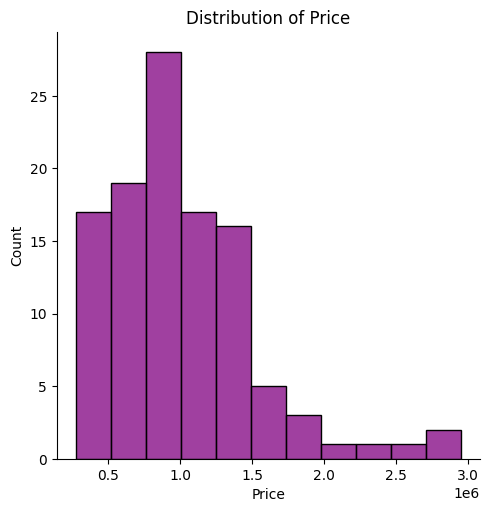

In [6]:
#let's visualise the distribution of price
sns.displot(data.Price, color = "purple")
plt.title("Distribution of Price")
plt.show() # so we have a right scewed data, because the tail is in the right

As it can be seen, we have a right-skewed data of a large scale.

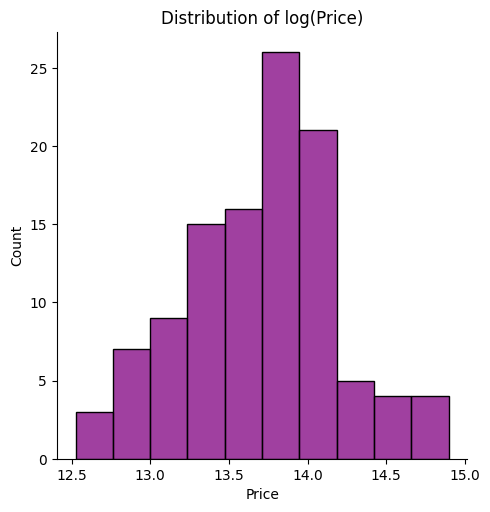

In [7]:
#Lets see what the log(price) distribution will look like
#see in logarithmic scale to decrease the scewedness
sns.displot(np.log(data.Price), color = "purple")
plt.title("Distribution of log(Price)")
plt.show() 

As it can be seen from the plot, the log(Price) distribution is more like a bell-shaped than the previous one.

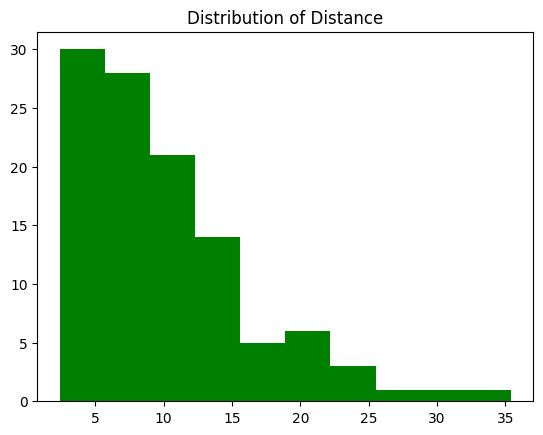

In [8]:
#let's visualise one of explanatory variables
plt.hist(data.Distance, color="green")
plt.title("Distribution of Distance")
plt.show()

In order to avoid a large number of columns after getting dummy variables, let's explore how many values there are under each categorical feature. 

In [9]:
#let's see categories and number of observations in each category for object variables
#gives the name of each categorical variable and its different values/categories
for i in data.select_dtypes(include="object").columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

Suburb 
 Ascot Vale          25
Brunswick           16
Ashburton            8
Brunswick East       5
Point Cook           3
Altona               2
Sunshine West        2
Roxburgh Park        2
Richmond             2
Reservoir            2
Oakleigh South       2
Broadmeadows         2
Brighton             2
Boronia              2
Taylors Hill         2
Werribee             2
Yarraville           2
Wheelers Hill        2
Toorak               2
Surrey Hills         1
Brighton East        1
Sunbury              1
South Morang         1
Seddon               1
Seaford              1
Seabrook             1
Thomastown           1
Ringwood North       1
Vermont              1
Preston              1
Altona North         1
Ashwood              1
West Footscray       1
Nunawading           1
Brunswick West       1
Brooklyn             1
Wyndham Vale         1
Blackburn North      1
Blackburn            1
Bayswater North      1
Balwyn               1
Avondale Heights     1
Aspendale            1
Pa

In [55]:
#let's drop the  following variables:"Suburb","Address","SellerG","CouncilArea",'Postcode',"Lattitude", "Longitude" 
#as some of them don't provide any meaningful information, and some have too many categories
data=data.drop(["Suburb","Address","SellerG","CouncilArea","Postcode", "Lattitude", "Longtitude"],axis=1)

KeyError: "['Suburb', 'Address', 'SellerG', 'CouncilArea'] not found in axis"

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          110 non-null    int64  
 1   Type           110 non-null    object 
 2   Price          110 non-null    int64  
 3   Method         110 non-null    object 
 4   Date           110 non-null    object 
 5   Distance       110 non-null    float64
 6   Bedroom        110 non-null    int64  
 7   Bathroom       110 non-null    int64  
 8   Car            110 non-null    int64  
 9   Landsize       110 non-null    int64  
 10  BuildingArea   110 non-null    float64
 11  YearBuilt      110 non-null    int64  
 12  Regionname     110 non-null    object 
 13  Propertycount  110 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 12.2+ KB


## 2.Data transformation for visual insights 
We can see that Suburbs, Address,SellerG, Date, CouncilArea have unique values for almost every observation. As most of them cannot be grouped into category with less levels, we will not use them in further analysis and prediction. However, we can try to get some insights with date variable, categorize it by season and use it for descriptive analysis.
### 2.1.Descriptive analysis using visualization 
<b> Let's outline some questions that might be insightful from price analytics point. </b>
  -Is there a seasonality trend for Price?       
  -Does the Price change drastically based on year/century built?          
  -Does the Price differ based on Region?(please try to explore and find patterns yourself)



In [46]:
#First let's transform the "Date" column into datetime format
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,3/8 Walter St,2,t,865000,SP,Nelson,2017-03-18,5.9,3032,...,2,1,146,132.0,2015,Moonee Valley City Council,-37.77130,144.90380,Western Metropolitan,6567
1,Ascot Vale,12/9 Milton St,2,u,442000,S,Alexkarbon,2016-06-18,5.9,3032,...,1,1,0,62.0,1975,Moonee Valley City Council,-37.77330,144.92190,Western Metropolitan,6567
2,Ascot Vale,21A Geddes St,3,h,1037500,S,Alexkarbon,2016-11-19,5.9,3032,...,1,2,506,110.0,1920,Moonee Valley City Council,-37.77790,144.91330,Western Metropolitan,6567
3,Ascot Vale,1/20 Newsom St,3,t,1050000,S,Jellis,2016-11-19,5.9,3032,...,2,2,318,160.0,2013,Moonee Valley City Council,-37.77440,144.90350,Western Metropolitan,6567
4,Ascot Vale,4/27 Roseberry St,2,u,440000,S,McDonald,2016-11-19,5.9,3032,...,1,1,0,65.0,1970,Moonee Valley City Council,-37.77490,144.91370,Western Metropolitan,6567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Sunshine West,2 Daley St,3,h,700000,S,Purplebricks,2017-07-10,10.5,3020,...,1,2,695,111.0,1970,Brimbank City Council,-37.78561,144.80739,Western Metropolitan,6763
106,Sunshine West,83 Gresham Wy,4,h,702500,S,S&L,2017-07-10,10.5,3020,...,2,2,903,187.0,2002,Brimbank City Council,-37.80053,144.80459,Western Metropolitan,6763
107,Surrey Hills,102 Empress Rd,3,h,1901000,S,RT,2017-07-10,10.2,3127,...,2,2,628,144.0,1950,Boroondara City Council,-37.82091,145.09543,Southern Metropolitan,5457
108,Taylors Hill,23 Eloura Cct,3,h,490000,S,YPA,2017-07-10,18.0,3037,...,2,2,251,128.0,2009,Melton City Council,-37.71202,144.75072,Western Metropolitan,4242


In [47]:
#separating the month
data["Month"]=data["Date"].apply(lambda x:x.month)

In [14]:
data.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Month
0,2,t,865000,SP,2017-03-18,5.9,2,2,1,146,132.0,2015,Western Metropolitan,6567,3
1,2,u,442000,S,2016-06-18,5.9,2,1,1,0,62.0,1975,Western Metropolitan,6567,6
2,3,h,1037500,S,2016-11-19,5.9,3,1,2,506,110.0,1920,Western Metropolitan,6567,11
3,3,t,1050000,S,2016-11-19,5.9,3,2,2,318,160.0,2013,Western Metropolitan,6567,11
4,2,u,440000,S,2016-11-19,5.9,2,1,1,0,65.0,1970,Western Metropolitan,6567,11


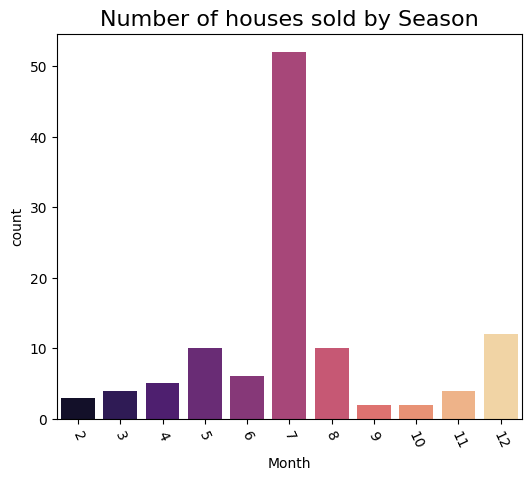

In [15]:
#let's see the Number of houses sold by season
plt.figure(figsize=(6,5))
cp=sns.countplot(x="Month",data=data, palette='magma',orient="h")
cp.set_xticklabels(cp.get_xticklabels(),rotation=-65)
plt.xlabel("Month")
plt.title("Number of houses sold by Season",fontdict={"fontsize":16})
plt.show()

In [48]:
#Creating new variable from the existing one
data['YearSold']=data["Date"].apply(lambda x:x.year)

In [17]:
data.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Month,YearSold
0,2,t,865000,SP,2017-03-18,5.9,2,2,1,146,132.0,2015,Western Metropolitan,6567,3,2017
1,2,u,442000,S,2016-06-18,5.9,2,1,1,0,62.0,1975,Western Metropolitan,6567,6,2016
2,3,h,1037500,S,2016-11-19,5.9,3,1,2,506,110.0,1920,Western Metropolitan,6567,11,2016
3,3,t,1050000,S,2016-11-19,5.9,3,2,2,318,160.0,2013,Western Metropolitan,6567,11,2016
4,2,u,440000,S,2016-11-19,5.9,2,1,1,0,65.0,1970,Western Metropolitan,6567,11,2016


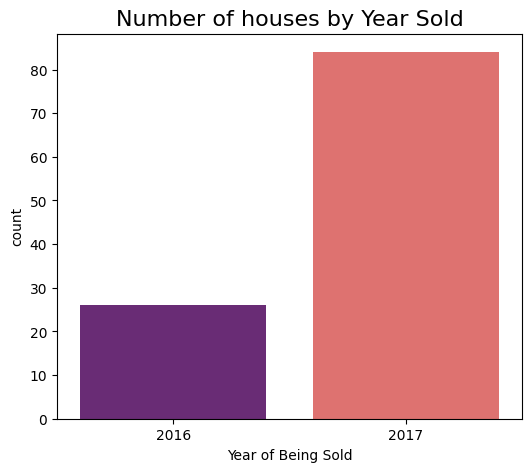

2


In [18]:
#When were most of the houses sold?
plt.figure(figsize=(6,5))
sns.countplot(x="YearSold",data=data, palette='magma')
plt.xlabel("Year of Being Sold")
plt.title("Number of houses by Year Sold",fontdict={"fontsize":16})
plt.show()
print(data.YearSold.nunique())

In [49]:
#An example of a derived varibale
#How many years "old" are the houses sold?
data["year_diff"]=data["YearSold"]-data["YearBuilt"]
print(data["year_diff"].describe())

count    110.000000
mean      52.754545
std       39.700065
min        0.000000
25%       12.250000
50%       47.000000
75%       87.000000
max      127.000000
Name: year_diff, dtype: float64


Note that 50% of the houses sold are 47 years old and the maximum age is 127.


In [50]:
#Let's see mean price of the houses by year built
yearly_df=data.groupby(by='YearBuilt').mean()
yearly_df

C:\Users\blilit\AppData\Local\Temp\ipykernel_26424\2439980087.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_df=data.groupby(by='YearBuilt').mean()


,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Month,YearSold,year_diff
YearBuilt,,,,,,,,,,,,,,,
1890,2.000000,9.846667e+05,4.033333,3078.000000,2.000000,1.000000,0.000000,139.000000,70.000000,-37.789317,144.978967,10800.000000,5.333333,2017.000000,127.000000
1900,2.909091,1.230409e+06,5.718182,3054.363636,2.818182,1.545455,0.909091,276.000000,126.818182,-37.792995,144.933642,7802.909091,5.818182,2016.545455,116.545455
1910,2.500000,1.095750e+06,5.375000,3044.250000,2.500000,1.250000,1.500000,250.750000,110.250000,-37.774975,144.944025,7646.250000,7.000000,2016.500000,106.500000
1920,3.666667,1.255250e+06,7.050000,3061.833333,3.666667,1.666667,1.666667,483.166667,152.666667,-37.783062,144.962483,8208.000000,7.666667,2016.500000,96.500000
1921,3.000000,1.652000e+06,5.200000,3056.000000,3.000000,1.000000,2.000000,506.000000,196.800000,-37.772300,144.969400,11918.000000,6.000000,2017.000000,96.000000
1925,3.000000,1.115000e+06,5.200000,3056.000000,3.000000,1.000000,1.000000,249.000000,116.000000,-37.766900,144.966400,11918.000000,8.000000,2017.000000,92.000000
1930,3.000000,1.446250e+06,7.900000,3104.750000,3.000000,1.500000,2.000000,379.250000,161.250000,-37.799955,145.015035,9363.000000,7.500000,2016.750000,86.750000
1935,3.000000,1.555000e+06,11.000000,3147.000000,3.000000,2.000000,2.000000,731.000000,149.000000,-37.866600,145.067600,3052.000000,4.000000,2016.000000,81.000000
1940,2.666667,9.473333e+05,7.800000,3101.333333,2.666667,1.666667,1.000000,356.000000,186.000000,-37.811210,145.032587,5550.333333,8.666667,2016.666667,76.666667


In [ ]:
plt.figure(num=None, figsize=(7,6))
plt.plot(yearly_df.Price)
plt.xlabel("Date")
plt.ylabel("Mean price")
plt.title('Mean price by Year Built', fontsize=15)


In [22]:
yearly_df.index

Int64Index([1890, 1900, 1910, 1920, 1921, 1925, 1930, 1935, 1940, 1945, 1950,
            1960, 1965, 1968, 1970, 1971, 1975, 1978, 1980, 1983, 1985, 2000,
            2002, 2003, 2004, 2005, 2006, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2017],
           dtype='int64', name='YearBuilt')

Apparently mean price has its highest peak at 2017. Fluctuations in price for other years might be dependent on Region and other factors as well. \
As we have too many years, it would be more convenient and representative for visualization to transform years into centuries. We will do it using the following function and apply() method

In [51]:
def century(row):
    if row>2000:
        val = "20th"
    else:
        val="19th"
    return val

In [52]:
data.YearBuilt.apply(century).value_counts()

19th    78
20th    32
Name: YearBuilt, dtype: int64

In [25]:
data.shape

(110, 17)

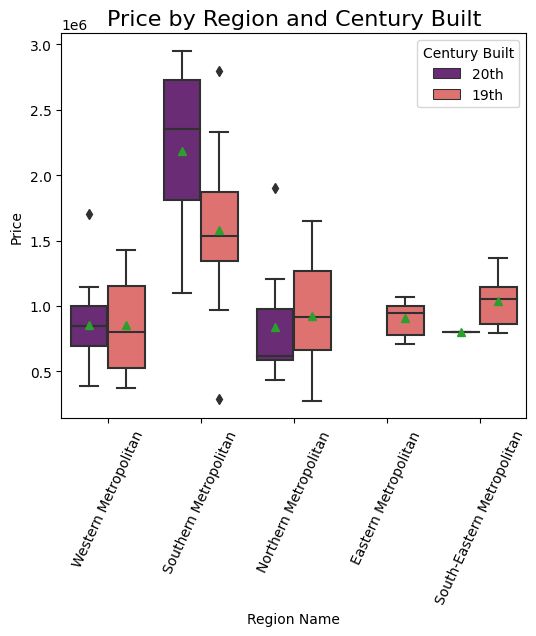

In [26]:
plt.figure(num=None, figsize=(6,5))
bx=sns.boxplot(x="Regionname",y="Price", data=data, palette='magma',hue=data.YearBuilt.apply(century),  showmeans=True)
bx.set_xticklabels(bx.get_xticklabels(),rotation=65)
plt.legend(title='Century Built', loc='upper right')
plt.xlabel("Region Name")
plt.title("Price by Region and Century Built",fontdict={"fontsize":16})
plt.show()

We can see that the highest mean price is at Souther Metropolitan region for houses built at 20th century. \
To have the final data without the transformed variables, we will drop them.


In [27]:
data=data.drop(["Date","YearBuilt","Month", "YearSold","year_diff" ],axis=1)

## 3. Model selection

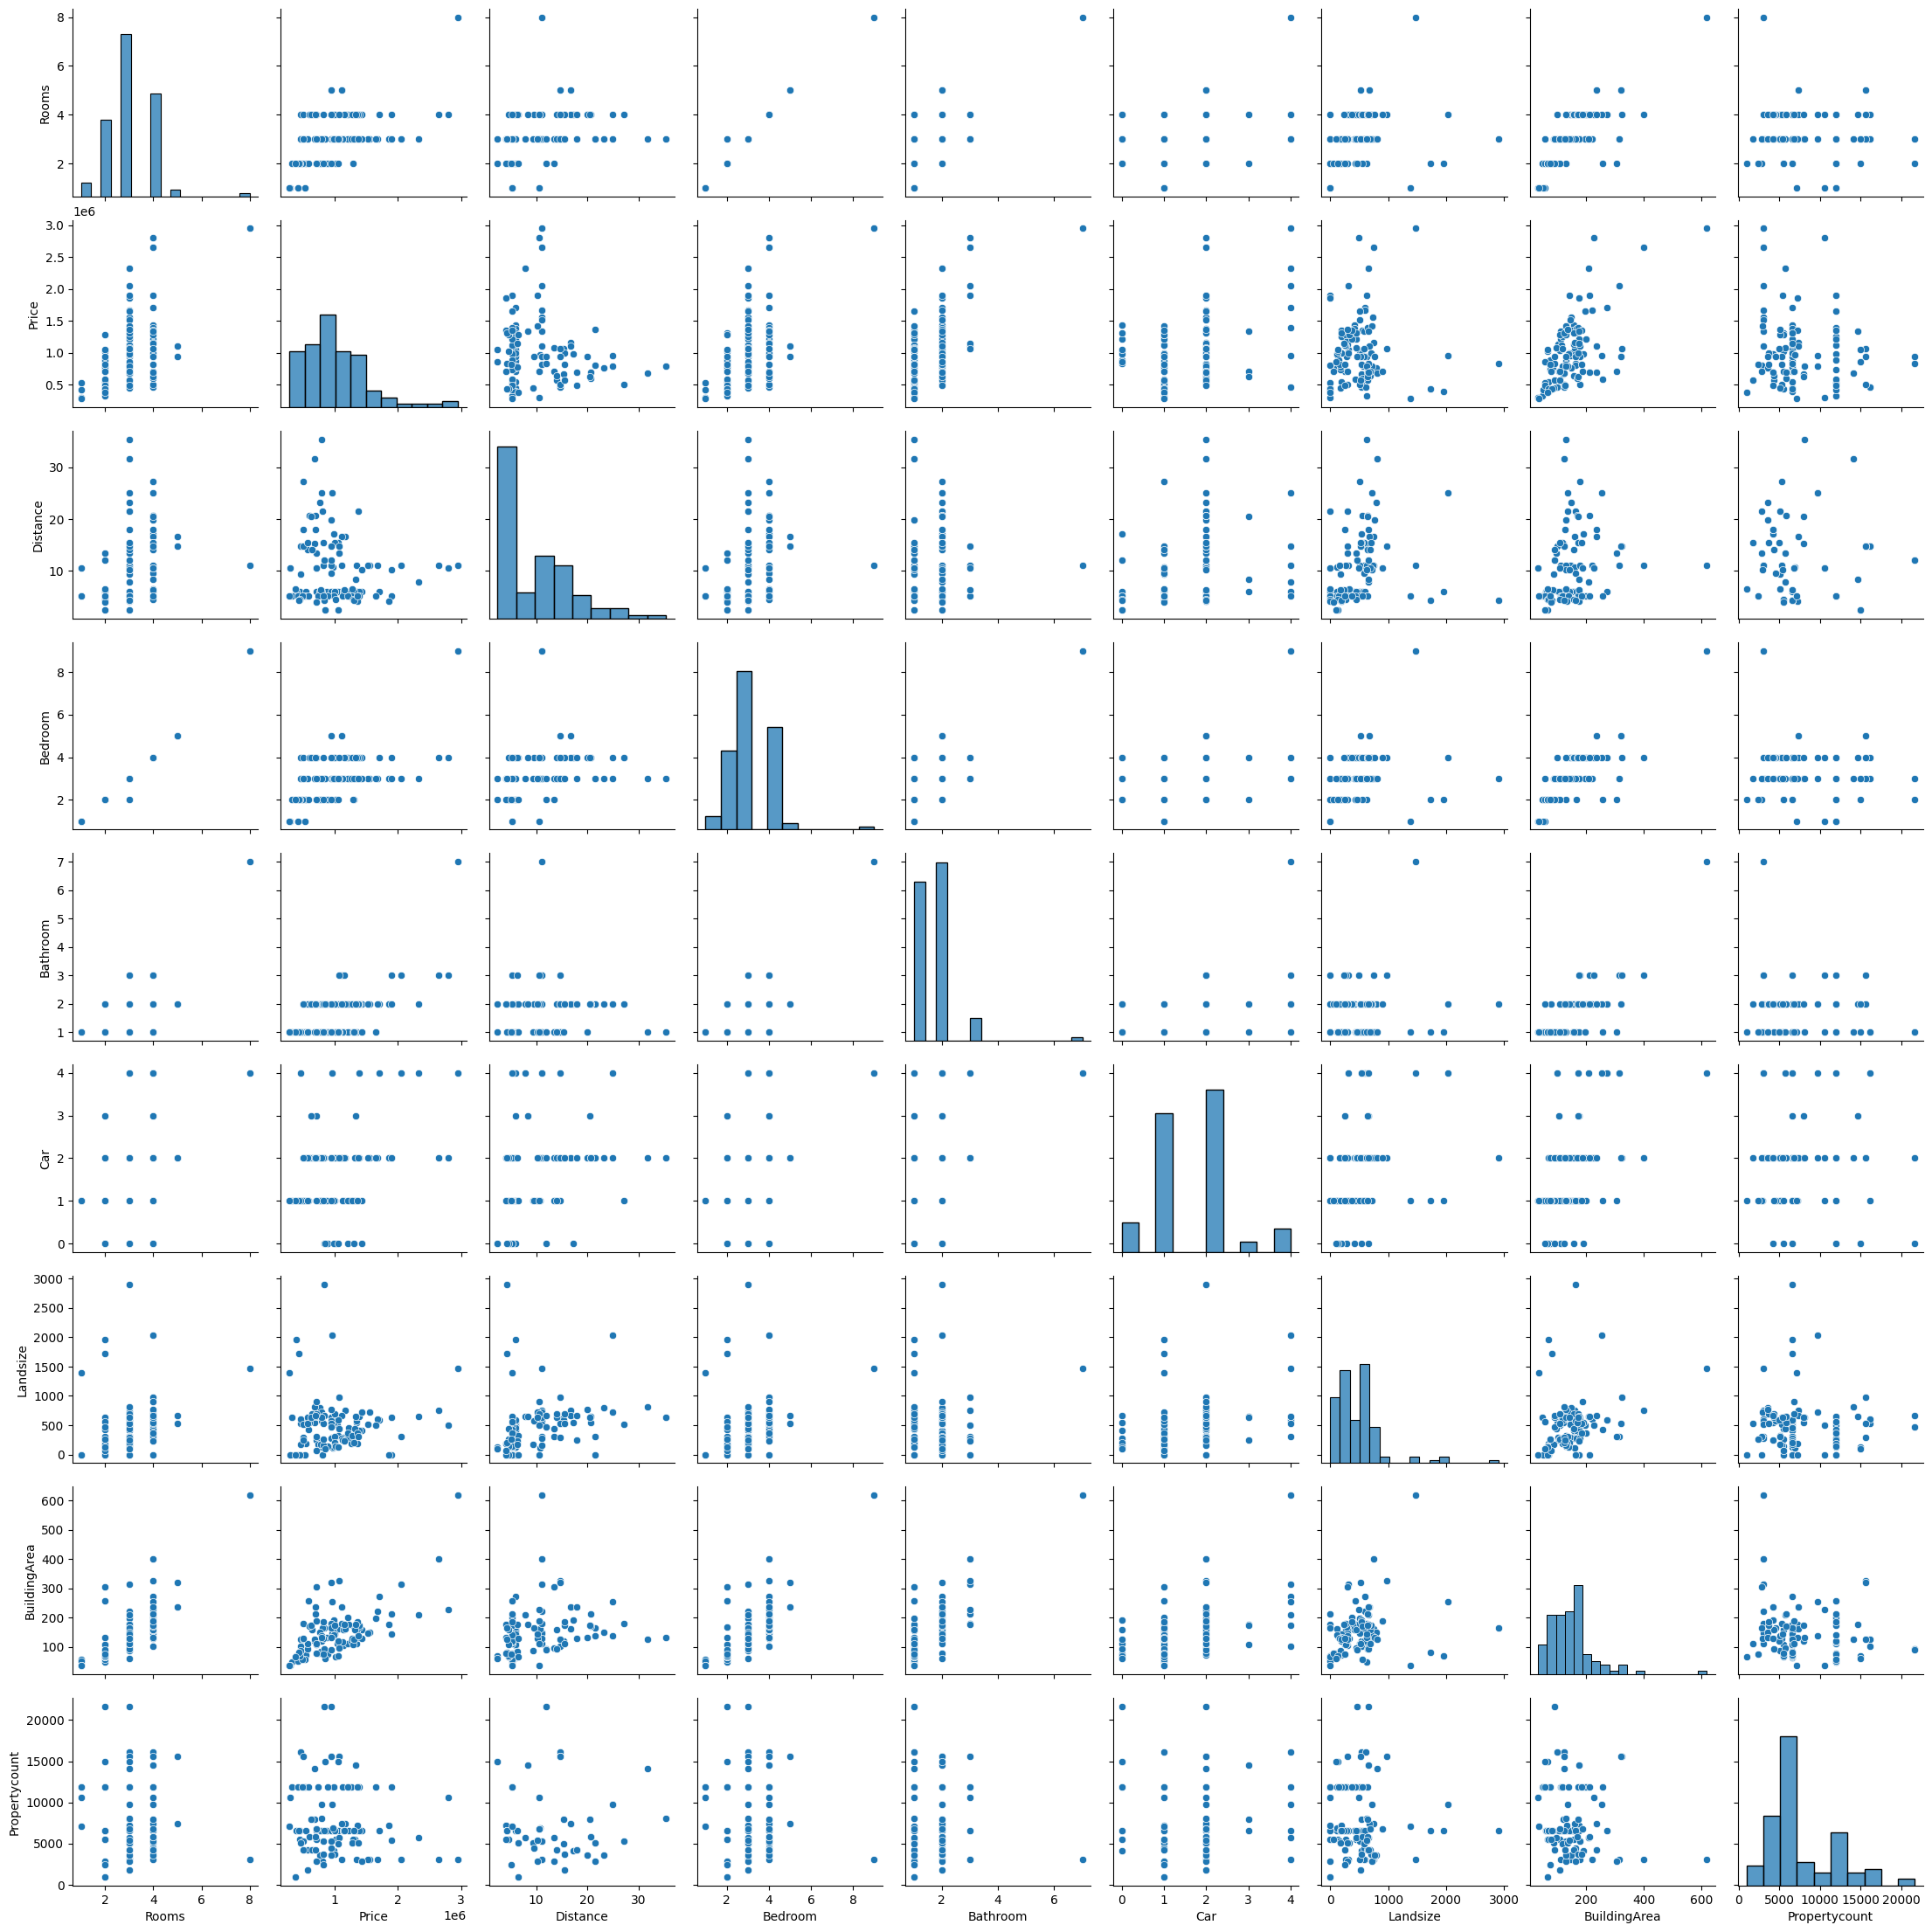

In [28]:
#To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric
#columns.
sns.pairplot(data)

To see the patterns interesting us in details, we can plot the pairs using appropriate types of plots. For this particular case there are not too many variables, so the plot is quite representative and no need for additional ones.

In [29]:
#lets see the corrplot
data.corr()

C:\Users\blilit\AppData\Local\Temp\ipykernel_26424\1667098481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount
Rooms,1.000000,0.496441,0.322496,0.992288,0.693759,0.427596,0.289627,0.743288,-0.094804
Price,0.496441,1.000000,-0.141503,0.498843,0.570595,0.329081,0.041088,0.628836,-0.134389
Distance,0.322496,-0.141503,1.000000,0.312113,0.133916,0.334017,0.244377,0.220520,-0.085765
Bedroom,0.992288,0.498843,0.312113,1.000000,0.724278,0.433750,0.298613,0.753977,-0.097368
Bathroom,0.693759,0.570595,0.133916,0.724278,1.000000,0.427814,0.187223,0.765947,-0.175644
Car,0.427596,0.329081,0.334017,0.433750,0.427814,1.000000,0.311213,0.487816,-0.102099
Landsize,0.289627,0.041088,0.244377,0.298613,0.187223,0.311213,1.000000,0.284929,-0.044187
BuildingArea,0.743288,0.628836,0.220520,0.753977,0.765947,0.487816,0.284929,1.000000,-0.150502
Propertycount,-0.094804,-0.134389,-0.085765,-0.097368,-0.175644,-0.102099,-0.044187,-0.150502,1.000000



There are a lot of pairs having high correlation, but the representation is not convenient to see the overall picture, thus we will use some visualizations.

C:\Users\blilit\AppData\Local\Temp\ipykernel_26424\2278657498.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs().round(2),annot=True)


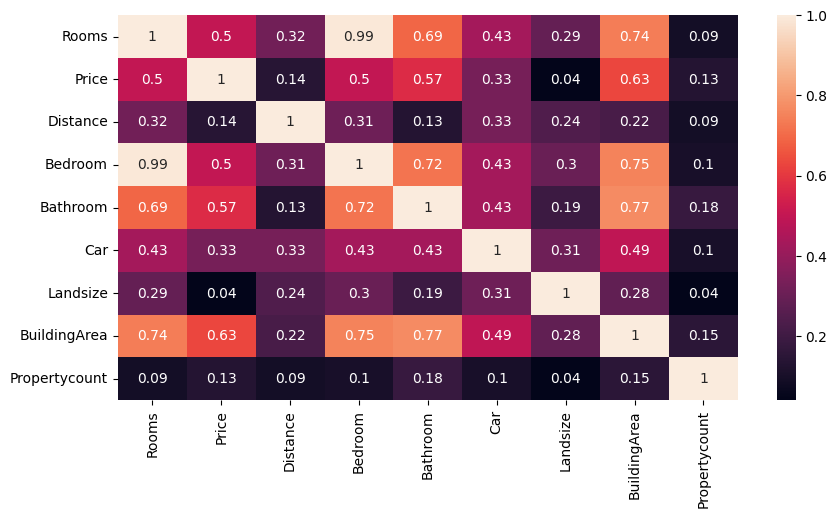

In [30]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

C:\Users\blilit\AppData\Local\Temp\ipykernel_26424\175289217.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs()>=0.75, cmap = "BuGn")


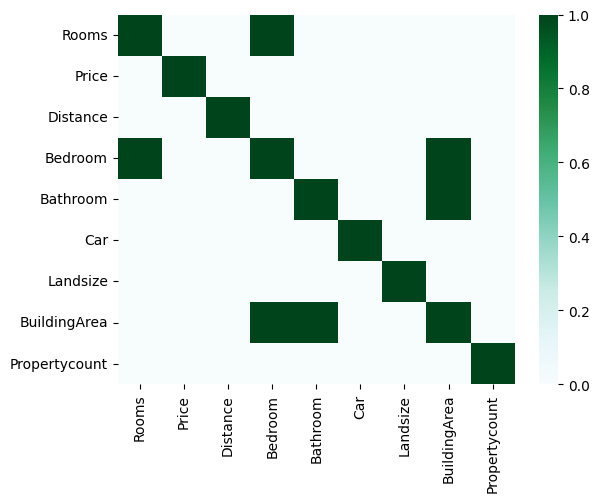

In [31]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
#Thus we will include only several of them in the analysis
sns.heatmap(data.corr().abs()>=0.75, cmap = "BuGn")
plt.show()

In [32]:
#let's drop Bedroom and bathroom variables, as they have high correlation coefficient and 
#the information is repeated in number of rooms.
data=data.drop(["Bedroom", "Bathroom"],axis=1)

C:\Users\blilit\AppData\Local\Temp\ipykernel_26424\2535735188.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")


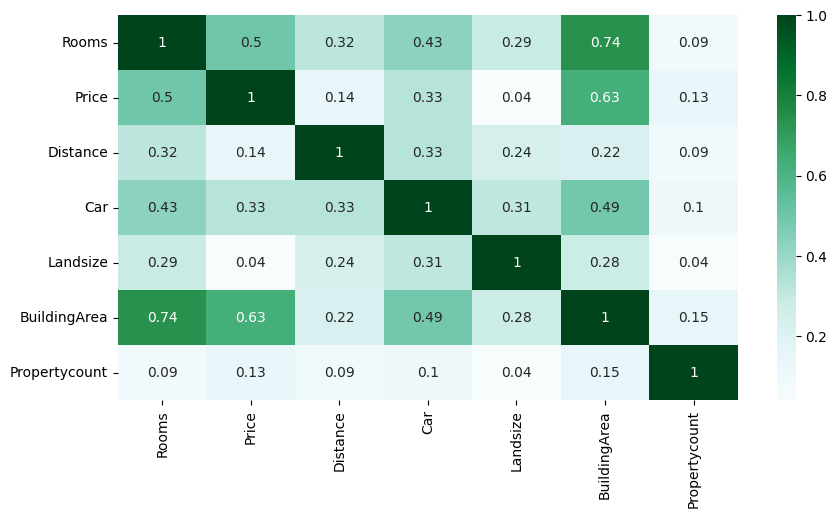

In [33]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

In [42]:
data.dtypes

Rooms                                      int64
Price                                      int64
Distance                                 float64
Car                                        int64
Landsize                                   int64
BuildingArea                             float64
Propertycount                              int64
Type_t                                     uint8
Type_u                                     uint8
Method_S                                   uint8
Method_SP                                  uint8
Method_VB                                  uint8
Regionname_Northern Metropolitan           uint8
Regionname_South-Eastern Metropolitan      uint8
Regionname_Southern Metropolitan           uint8
Regionname_Western Metropolitan            uint8
dtype: object

In [53]:
data.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                     int64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom                   int64
Bathroom                  int64
Car                       int64
Landsize                  int64
BuildingArea            float64
YearBuilt                 int64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
Month                     int64
YearSold                  int64
year_diff                 int64
dtype: object

After dropping the noted variables we see that there is no correlation coefficient higher than 0.75 so won't exclude any other variable.


In [56]:
#let's convert categorical variables in the dataset into dummy variables
data=pd.get_dummies(data,drop_first=True)
data.head()
data.dtypes

Rooms                                             int64
Price                                             int64
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int64
                                              ...      
CouncilArea_Yarra City Council                    uint8
Regionname_Northern Metropolitan                  uint8
Regionname_South-Eastern Metropolitan             uint8
Regionname_Southern Metropolitan                  uint8
Regionname_Western Metropolitan                   uint8
Length: 233, dtype: object

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  110 non-null    int64  
 1   Price                                  110 non-null    int64  
 2   Distance                               110 non-null    float64
 3   Car                                    110 non-null    int64  
 4   Landsize                               110 non-null    int64  
 5   BuildingArea                           110 non-null    float64
 6   Propertycount                          110 non-null    int64  
 7   Type_t                                 110 non-null    uint8  
 8   Type_u                                 110 non-null    uint8  
 9   Method_S                               110 non-null    uint8  
 10  Method_SP                              110 non-null    uint8  
 11  Method

## 4. Running and building the OLS model (backward selection, model transformation, test performance))
The steps will be as following:
1. split the data into train and test sets,
2. build(fit) the model on the train set and see the summary (look at R-squared),
3. make predictions for the test set and calculate the R-squared,
4. compare train-test score gap, analyse train model coefficients p-values and make the transformations,
5. repeat until a desired score is got,
6. in case of having several competing models (from test score similarity point), check assumptions for all models and    select the one holding all of them. If LINE is not held, transform the data further.
7. NOTE: Coefficients are interpreted for the models fitted on training set.

In [57]:
#setting the independent and dependent varables
Y=data["Price"]
X=data.drop("Price", axis=1)

In [58]:
X = sm.add_constant(X)

In [59]:
X.columns

Index(['const', 'Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea',
       ...
       'CouncilArea_Moreland City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan'],
      dtype='object', length=233)

In [38]:
#Splitting the data into train and test sets 0s are for train and 1s for test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [60]:
model_linear = sm.OLS(Y_train, X_train).fit()

 <b> Last, see the summary.  </b>

In [40]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     27.62
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.12e-22
Time:                        18:33:50   Log-Likelihood:                -1110.2
No. Observations:                  82   AIC:                             2252.
Df Residuals:                      66   BIC:                             2291.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.024e+06   1.64e+05      6.228      0.000    6.96e+05    1.35e+06
Rooms                                  2.803e+04   4.73e+04      0.593      0.555   -6.64e+04    1.22e+05
Distance                              -3.321e+04   5132.614     -6.471      0.000   -4.35e+04    -2.3e+04
Car                                    3.956e+04   2.92e+04      1.357      0.179   -1.87e+04    9.78e+04
Landsize                                -43.4948     81.371     -0.535      0.595    -205.957     118.968
BuildingArea                           1819.2376    542.327      3.355      0.001     736.446    2902.029
Propertycount                             6.8799      6.543      1.052      0.297      -6.183      19.943
Type_t                                 -1.08e+05   9.07e+04     -1.191      0.238   -2.89e+05    7.31e+04
Type_u                                 -4.24e+05   8.48e+04     -4.998      0.000   -5.93e+05   -2.55e+05
Method_S                                9.02e+04   7.57e+04      1.192      0.238   -6.09e+04    2.41e+05
Method_SP                              1.393e+05   1.04e+05      1.344      0.183   -6.76e+04    3.46e+05
Method_VB                              5.957e+05   1.47e+05      4.043      0.000    3.02e+05     8.9e+05
Regionname_Northern Metropolitan      -2.764e+05   1.18e+05     -2.335      0.023   -5.13e+05      -4e+04
Regionname_South-Eastern Metropolitan  9.365e+04    1.2e+05      0.779      0.439   -1.46e+05    3.34e+05
Regionname_Southern Metropolitan       5.724e+05   1.17e+05      4.907      0.000    3.39e+05    8.05e+05
Regionname_Western Metropolitan       -3.268e+05   1.04e+05     -3.129      0.003   -5.35e+05   -1.18e+05
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.134
Skew:                           0.095   Prob(JB):                        0.935
Kurtosis:                       2.944   Cond. No.                     9.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#Let's see the significant and not significant variables
results.pvalues[results.pvalues<0.05]

NameError: name 'results' is not defined

In [ ]:
#not significant ones
results.pvalues[results.pvalues>0.05]

In [ ]:
#The R-squared and R-squared adjusted of the first model including all the variables, are the following, in respective order:
#0.863 and 0.831
#Let's see how the model performs on the test set (external validity) and then check its internal validity.

In [ ]:
#predicting for train and test data
Y_test_linear = results.predict(X_test)
Y_train_linear = results.predict(X_train)

R-squared Train: 0.8626070936982513 \
R-squared Test: 0.4982891114219048 \
We can see a huge overfitting problem here: 86.3 on train set vs 49 on test set. As Landsize has the highest p-value, we will remove it and see the results again    

In [ ]:
#the constant ("const") is already in the model, so we don't add it manually
Y_train_second=Y_train
X_train_second=X_train.drop("Landsize", axis=1)

In [ ]:
#running and building using one line of code
results_1= sm.OLS(Y_train_second,X_train_second).fit()

In [ ]:
results_1.summary()

In [61]:
#X1 still has "Landsize" feature and lacks "const" variable added by add_constant, 
#so we will have to drop Landsize in order to make predictions
X_test.columns.tolist()

['const',
 'Rooms',
 'Distance',
 'Car',
 'Landsize',
 'BuildingArea',
 'Propertycount',
 'Type_t',
 'Type_u',
 'Method_S',
 'Method_SP',
 'Method_VB',
 'Regionname_Northern Metropolitan',
 'Regionname_South-Eastern Metropolitan',
 'Regionname_Southern Metropolitan',
 'Regionname_Western Metropolitan']

In [ ]:
#Lets see the model's predictions for train and test sets. We drop Landsize from the test data for this model.
Y_train_linear_2=results_1.predict(X_train_second)
Y_test_linear_2=results_1.predict(sm.add_constant(X_test.drop("Landsize", axis=1)))

In [62]:
#let's see r-squared for train and test sets for the model without Landsize
print("R-squared Train:",r2_score(Y_train,Y_train_linear_2))
print("R-squared Test:",r2_score(Y_test,Y_test_linear_2))

NameError: name 'Y_train_linear_2' is not defined

We can see that the second model has marginally worse R-squared for the test set. In case of backward selection, one should continue removing the not significant variables based on their p-value size. This process can be continued till some desired output of R-squared and R-squared adjusted is reached